In [27]:
from mxnet import nd
num_train,num_test=100,100
X=nd.random.normal(shape=(num_test+num_train,1))
X=nd.concat(X,nd.power(X,2),nd.power(X,3))
true_w,true_b=[1.4,2.5,5.2],3.3 
y=true_w[0]*X[:,0]+true_w[1]*X[:,1]+true_w[2]*X[:,2]+true_b
y+=nd.random.normal(shape=y.shape)
y_train,y_test=y[:num_train],y[num_train:]
x_train,x_test=X[:num_train],X[num_train:]
X[:5 ]


[[-1.0643908   1.1329278  -1.2058778 ]
 [-1.2878599   1.6585832  -2.1360228 ]
 [-0.59964615  0.3595755  -0.21561807]
 [-0.25189096  0.06344905 -0.01598224]
 [ 0.14286116  0.02040931  0.0029157 ]]
<NDArray 5x3 @cpu(0)>

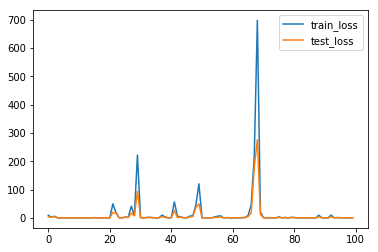

In [28]:
import matplotlib.pyplot as plt
from mxnet import gluon, autograd
dataset = gluon.data.ArrayDataset(x_train, y_train)
batch_size = 1
train_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
net.initialize()
l2Loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': .01  })
epochs = 100
train_loss, test_loss = [], []
for e in range(epochs):
    for data, label in train_iter:
        with autograd.record():
            y = net(data)
            loss = l2Loss(y, label)
        loss.backward()
        trainer.step(batch_size)
    train_loss += [l2Loss(net(x_train), y_train).mean().asscalar()]
    test_loss += [l2Loss(net(x_test), y_test).mean().asscalar()]

plt.plot(train_loss, label='train_loss')
plt.plot(test_loss, label='test_loss')
plt.legend()
plt.show()

In [29]:
dense=net[0]
dense.weight.data(),dense.bias.data()

(
 [[1.3526151 2.6964266 5.02503  ]]
 <NDArray 1x3 @cpu(0)>, 
 [3.3035798]
 <NDArray 1 @cpu(0)>)